Single-channel CSC (Constrained Penalty Term)
=============================================

This example demonstrates solving a constrained convolutional sparse coding problem with a greyscale signal

  $$\mathrm{argmin}_\mathbf{x} \; (1/2) \left\| \sum_m \mathbf{d}_m * \mathbf{x}_m - \mathbf{s} \right\|_2^2 \; \text{such that} \; \sum_m \| \mathbf{x}_m \|_1 \leq \gamma \;,$$

where $\mathbf{d}_{m}$ is the $m^{\text{th}}$ dictionary filter, $\mathbf{x}_{m}$ is the coefficient map corresponding to the $m^{\text{th}}$ dictionary filter, and $\mathbf{s}$ is the input image.

In [1]:
from __future__ import print_function
from builtins import input

import pyfftw   # See https://github.com/pyFFTW/pyFFTW/issues/40
import numpy as np

from sporco import util
from sporco import signal
from sporco import plot
plot.config_notebook_plotting()
import sporco.metric as sm
from sporco.admm import cbpdn

Load example image.

In [2]:
img = util.ExampleImages().image('kodim23.png', scaled=True, gray=True,
                                 idxexp=np.s_[160:416,60:316])

Highpass filter example image.

In [3]:
npd = 16
fltlmbd = 10
sl, sh = signal.tikhonov_filter(img, fltlmbd, npd)

Load dictionary and display it.

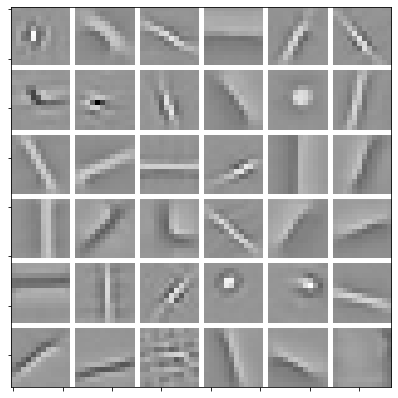

In [4]:
D = util.convdicts()['G:12x12x36']
plot.imview(util.tiledict(D), fgsz=(7, 7))

Set [admm.cbpdn.ConvBPDNProjL1](http://sporco.rtfd.org/en/latest/modules/sporco.admm.cbpdn.html#sporco.admm.cbpdn.ConvBPDNProjL1) solver options.

In [5]:
gamma = 4.05e2
opt = cbpdn.ConvBPDNProjL1.Options({'Verbose': True, 'MaxMainIter': 250,
                    'HighMemSolve': True, 'LinSolveCheck': False,
                    'RelStopTol': 5e-3, 'AuxVarObj': True, 'rho': 3e0,
                    'AutoRho': {'Enabled': True}})

Initialise and run CSC solver.

In [6]:
b = cbpdn.ConvBPDNProjL1(D, sh, gamma, opt)
X = b.solve()
print("ConvBPDNProjL1 solve time: %.2fs" % b.timer.elapsed('solve'))

Itn   Fnc       Cnstr     r         s         ρ       
------------------------------------------------------


   0  2.74e+01  0.00e+00  6.00e-01  8.66e-01  3.00e+00


   1  1.66e+01  1.26e-08  3.71e-01  3.29e-01  3.00e+00


   2  1.23e+01  0.00e+00  2.85e-01  2.09e-01  3.00e+00


   3  1.00e+01  0.00e+00  1.97e-01  1.56e-01  3.51e+00


   4  8.75e+00  0.00e+00  1.46e-01  1.24e-01  3.95e+00


   5  7.95e+00  0.00e+00  1.18e-01  1.05e-01  3.95e+00


   6  7.43e+00  3.74e-07  9.66e-02  8.76e-02  3.95e+00


   7  6.98e+00  1.24e-09  8.01e-02  7.54e-02  3.95e+00


   8  6.62e+00  0.00e+00  6.73e-02  6.65e-02  3.95e+00


   9  6.37e+00  1.89e-07  5.72e-02  5.92e-02  3.95e+00


  10  6.18e+00  0.00e+00  4.93e-02  5.26e-02  3.95e+00


  11  6.01e+00  0.00e+00  4.28e-02  4.75e-02  3.95e+00


  12  5.87e+00  0.00e+00  3.75e-02  4.32e-02  3.95e+00


  13  5.76e+00  0.00e+00  3.33e-02  3.95e-02  3.95e+00


  14  5.67e+00  0.00e+00  2.98e-02  3.63e-02  3.95e+00


  15  5.59e+00  0.00e+00  2.86e-02  3.35e-02  3.57e+00


  16  5.52e+00  0.00e+00  2.59e-02  3.07e-02  3.57e+00


  17  5.46e+00  2.12e-07  2.37e-02  2.84e-02  3.57e+00


  18  5.40e+00  0.00e+00  2.29e-02  2.67e-02  3.26e+00


  19  5.36e+00  0.00e+00  2.11e-02  2.49e-02  3.26e+00


  20  5.32e+00  2.14e-07  1.95e-02  2.32e-02  3.26e+00


  21  5.28e+00  0.00e+00  1.81e-02  2.18e-02  3.26e+00


  22  5.25e+00  0.00e+00  1.79e-02  2.05e-02  2.97e+00


  23  5.22e+00  0.00e+00  1.68e-02  1.92e-02  2.97e+00


  24  5.19e+00  0.00e+00  1.58e-02  1.81e-02  2.97e+00


  25  5.17e+00  7.01e-07  1.48e-02  1.71e-02  2.97e+00


  26  5.15e+00  2.77e-07  1.39e-02  1.62e-02  2.97e+00


  27  5.13e+00  0.00e+00  1.31e-02  1.53e-02  2.97e+00


  28  5.11e+00  0.00e+00  1.23e-02  1.46e-02  2.97e+00


  29  5.10e+00  0.00e+00  1.16e-02  1.39e-02  2.97e+00


  30  5.08e+00  0.00e+00  1.10e-02  1.33e-02  2.97e+00


  31  5.07e+00  0.00e+00  1.11e-02  1.27e-02  2.70e+00


  32  5.05e+00  0.00e+00  1.05e-02  1.21e-02  2.70e+00


  33  5.04e+00  0.00e+00  1.00e-02  1.15e-02  2.70e+00


  34  5.03e+00  6.88e-10  9.59e-03  1.10e-02  2.70e+00


  35  5.02e+00  2.64e-10  9.14e-03  1.05e-02  2.70e+00


  36  5.02e+00  0.00e+00  8.71e-03  1.01e-02  2.70e+00


  37  5.01e+00  0.00e+00  8.32e-03  9.75e-03  2.70e+00


  38  5.00e+00  0.00e+00  7.94e-03  9.38e-03  2.70e+00


  39  4.99e+00  0.00e+00  7.60e-03  9.03e-03  2.70e+00


  40  4.98e+00  6.67e-10  7.27e-03  8.68e-03  2.70e+00


  41  4.98e+00  0.00e+00  6.96e-03  8.39e-03  2.70e+00


  42  4.97e+00  0.00e+00  7.11e-03  8.08e-03  2.46e+00


  43  4.97e+00  6.61e-10  6.86e-03  7.77e-03  2.46e+00


  44  4.96e+00  0.00e+00  6.62e-03  7.49e-03  2.46e+00


  45  4.96e+00  0.00e+00  6.37e-03  7.21e-03  2.46e+00


  46  4.95e+00  0.00e+00  6.13e-03  6.95e-03  2.46e+00


  47  4.95e+00  0.00e+00  5.90e-03  6.71e-03  2.46e+00


  48  4.94e+00  0.00e+00  5.68e-03  6.48e-03  2.46e+00


  49  4.94e+00  0.00e+00  5.47e-03  6.27e-03  2.46e+00


  50  4.94e+00  5.25e-07  5.27e-03  6.07e-03  2.46e+00


  51  4.93e+00  0.00e+00  5.08e-03  5.89e-03  2.46e+00


  52  4.93e+00  0.00e+00  4.90e-03  5.69e-03  2.46e+00


  53  4.93e+00  0.00e+00  4.71e-03  5.52e-03  2.46e+00


  54  4.92e+00  2.37e-10  4.54e-03  5.34e-03  2.46e+00


  55  4.92e+00  2.43e-10  4.38e-03  5.16e-03  2.46e+00


  56  4.92e+00  0.00e+00  4.23e-03  5.03e-03  2.46e+00


  57  4.92e+00  5.29e-07  4.09e-03  4.89e-03  2.46e+00
------------------------------------------------------
ConvBPDNProjL1 solve time: 24.02s


Reconstruct image from sparse representation.

In [7]:
shr = b.reconstruct().squeeze()
imgr = sl + shr
print("Reconstruction PSNR: %.2fdB\n" % sm.psnr(img, imgr))

Reconstruction PSNR: 37.72dB



Display low pass component and sum of absolute values of coefficient maps of highpass component.

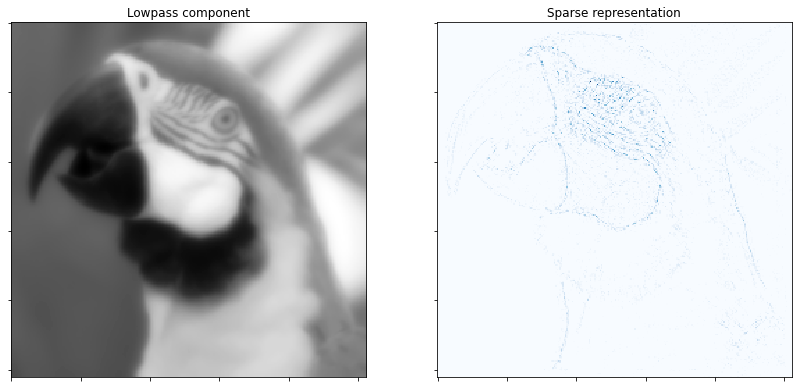

In [8]:
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(sl, title='Lowpass component', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(np.sum(abs(X), axis=b.cri.axisM).squeeze(), cmap=plot.cm.Blues,
            title='Sparse representation', fig=fig)
fig.show()

Display original and reconstructed images.

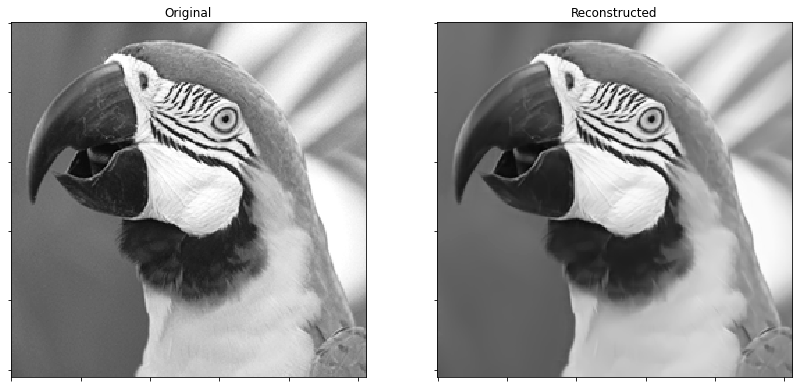

In [9]:
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(img, title='Original', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(imgr, title='Reconstructed', fig=fig)
fig.show()

Get iterations statistics from solver object and plot functional value, ADMM primary and dual residuals, and automatically adjusted ADMM penalty parameter against the iteration number.

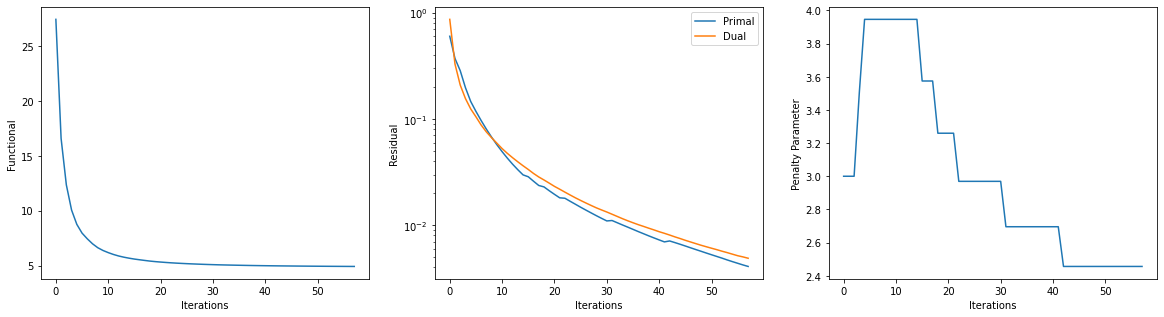

In [10]:
its = b.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.PrimalRsdl, its.DualRsdl)).T,
          ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          lgnd=['Primal', 'Dual'], fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its.Rho, xlbl='Iterations', ylbl='Penalty Parameter', fig=fig)
fig.show()